In [78]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [79]:
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

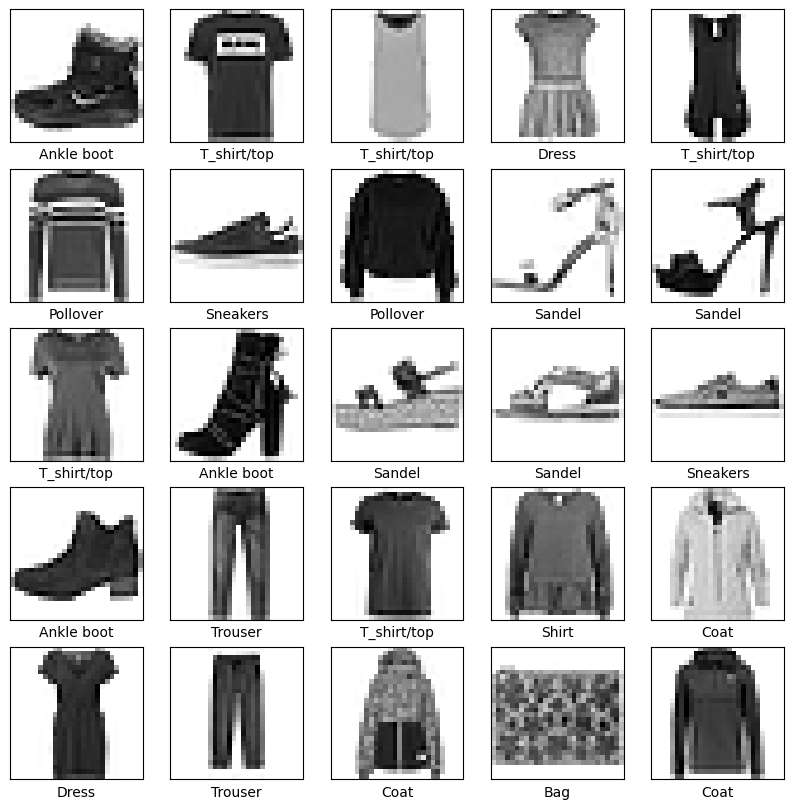

In [80]:
class_names =['T_shirt/top','Trouser','Pollover','Dress','Coat','Sandel','Shirt','Sneakers','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  #plt.xlabel(class_names[np.argmax(train_labels[i])])
  plt.xlabel(class_names[train_labels[i]])

plt.show()


In [81]:
train_images = (train_images / 127.5)-1
test_images = (test_images / 127.5)-1



In [82]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [83]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [84]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [86]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [87]:
history= model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4887 - accuracy: 0.8228 - val_loss: 0.4224 - val_accuracy: 0.8459
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3738 - accuracy: 0.8640 - val_loss: 0.4110 - val_accuracy: 0.8514
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3416 - accuracy: 0.8735 - val_loss: 0.3789 - val_accuracy: 0.8638
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3173 - accuracy: 0.8824 - val_loss: 0.3938 - val_accuracy: 0.8582
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3016 - accuracy: 0.8882 - val_loss: 0.4107 - val_accuracy: 0.8580
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2860 - accuracy: 0.8940 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2745 - accuracy: 0.8982 - val_loss: 0.3550 - val_accu

Text(0.5, 1.0, 'Accuarcy')

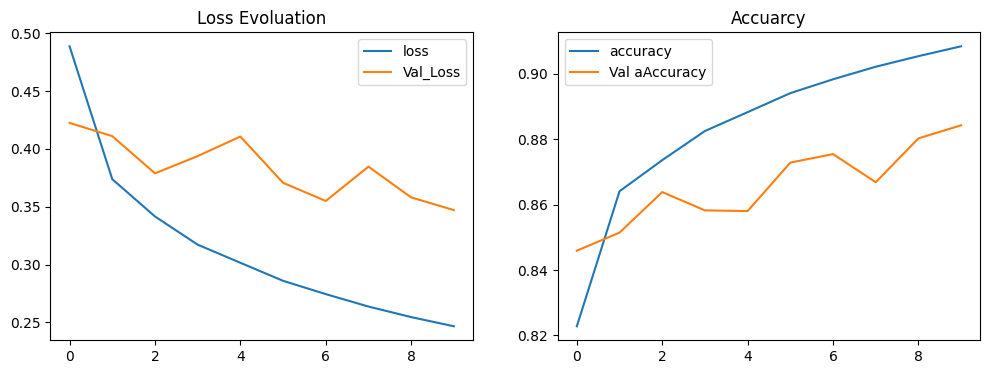

In [88]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.legend()
plt.title('Loss Evoluation')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label= 'Val aAccuracy')
plt.legend()
plt.title('Accuarcy')

313/313 [==============================] - 2s 5ms/step


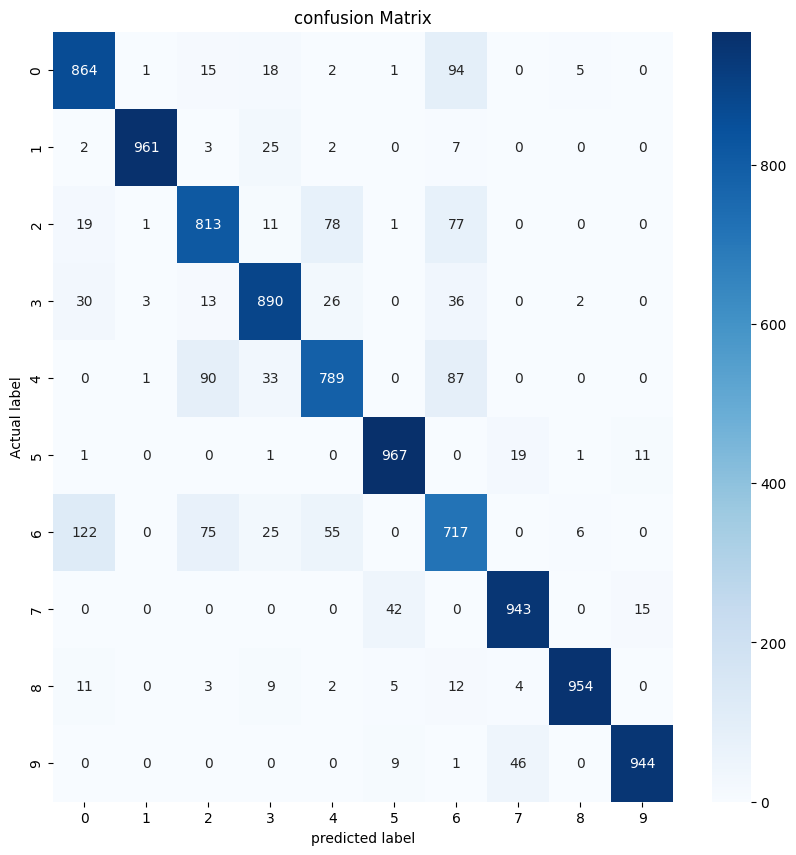

In [92]:
y_pred = model.predict(test_images)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(test_labels,axis=1)

cm = confusion_matrix(y_true , y_pred_classes)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
plt.show()